### decision tree

In [8]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np



In [4]:
import joblib

In [6]:
best_model = joblib.load(r'C:\Users\amahe\Downloads\DT.joblib')
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=0)

tp:266, tn 326, fp: 36, rn: 54


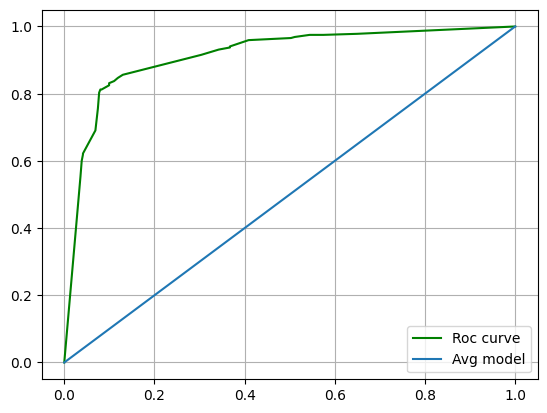

,Decision tree
Accuracy,0.868035
precison,0.880795
recall,0.831250
f1_score,0.855305
auc_score,0.913722


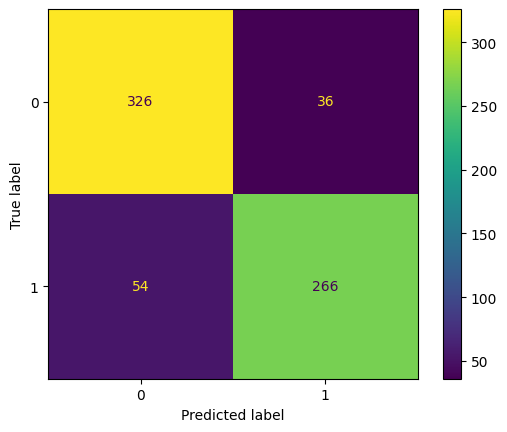

In [7]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"C:\Users\amahe\Downloads\preprocessd_data_cleaned.csv")
X = data.drop("churn",axis=1)
y = data["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
from sklearn.tree   import DecisionTreeClassifier,plot_tree
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,    \
                            f1_score,         \
                            confusion_matrix,   \
                            ConfusionMatrixDisplay,\
                            roc_auc_score,roc_curve

tp = np.sum((y_test == 1) & (y_pred == 1)) #tn
tn = np.sum((y_test == 0) & (y_pred == 0))  # tp
fp = np.sum((y_test == 0) & (y_pred == 1))  # fp
fn = np.sum((y_test == 1) & (y_pred == 0)) #fn

print(f"tp:{tp}, tn {tn}, fp: {fp}, rn: {fn}")
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) 
recall = tp / (tp + fn) 
f1_score = 2 * precision * recall / (precision + recall)

prob =  best_model.predict_proba(X_test)
level_1_proba = prob[:,1]
level_1_proba
fpr,tpr,threshold=roc_curve(y_test,level_1_proba)
plt.plot(fpr,tpr,color="green",label ="Roc curve")
plt.plot([0,1],[0,1],label="Avg model")
plt.legend()
plt.grid()
plt.show()
from sklearn.metrics import auc
auc=auc(fpr,tpr)
cmt = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cmt).plot()

metrics = [accuracy,precision,recall,f1_score,auc]
columns = ["Accuracy","precison","recall","f1_score","auc_score"]

descision_tree =pd.DataFrame(metrics,columns,columns=["Decision tree"])
descision_tree

### random forest

In [9]:
import joblib

In [10]:
best_random = joblib.load(r"C:\Users\amahe\Downloads\RF.joblib")
best_random

RandomForestClassifier(max_depth=8, random_state=42)

tp:273, tn 327, fp: 35, rn: 47


,random forest
Accuracy,0.879765
precison,0.886364
recall,0.853125
f1_score,0.869427
auc_score,0.951675


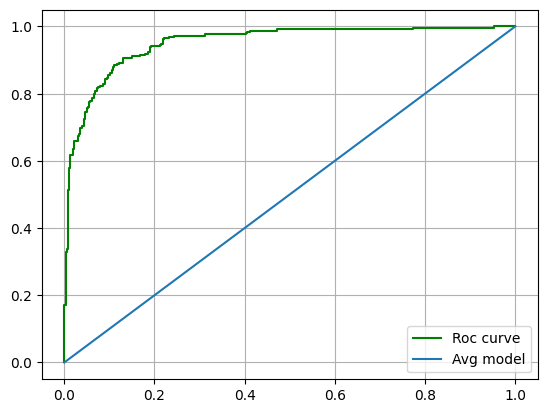

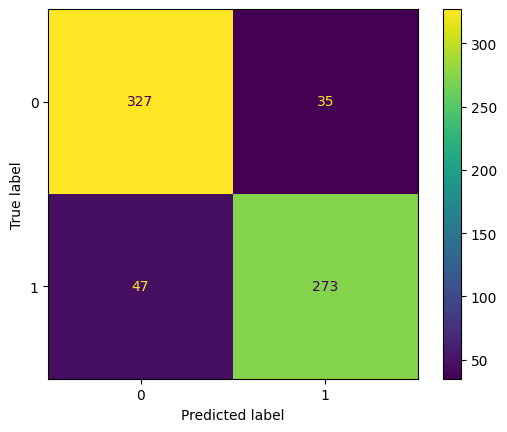

In [11]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"C:\Users\amahe\Downloads\preprocessd_data_cleaned.csv")
X = data.drop("churn",axis=1)
y = data["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
from sklearn.ensemble import RandomForestClassifier

best_random.fit(X_train,y_train)
y_pred = best_random.predict(X_test)
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,    \
                            f1_score,         \
                            confusion_matrix,   \
                            ConfusionMatrixDisplay,\
                            roc_auc_score,roc_curve

tp = np.sum((y_test == 1) & (y_pred == 1)) #tn
tn = np.sum((y_test == 0) & (y_pred == 0))  # tp
fp = np.sum((y_test == 0) & (y_pred == 1))  # fp
fn = np.sum((y_test == 1) & (y_pred == 0)) #fn

print(f"tp:{tp}, tn {tn}, fp: {fp}, rn: {fn}")
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) 
recall = tp / (tp + fn) 
f1_score = 2 * precision * recall / (precision + recall)

prob =  best_random.predict_proba(X_test)
level_1_proba = prob[:,1]
level_1_proba
fpr,tpr,threshold=roc_curve(y_test,level_1_proba)
plt.plot(fpr,tpr,color="green",label ="Roc curve")
plt.plot([0,1],[0,1],label="Avg model")
plt.legend()
plt.grid()
from sklearn.metrics import auc
auc=auc(fpr,tpr)
cmt = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cmt).plot()

metrics = [accuracy,precision,recall,f1_score,auc]
columns = ["Accuracy","precison","recall","f1_score","auc_score"]

random_forest =pd.DataFrame(metrics,columns,columns=["random forest"])
random_forest

In [15]:
compare = pd.concat([random_forest,descision_tree],axis=1)
compare

,random forest,Decision tree
Accuracy,0.879765,0.868035
precison,0.886364,0.880795
recall,0.853125,0.831250
f1_score,0.869427,0.855305
auc_score,0.951675,0.913722


In [17]:
compare.T.sort_values(by = 'Accuracy',ascending= False)

,Accuracy,precison,recall,f1_score,auc_score
random forest,0.879765,0.886364,0.853125,0.869427,0.951675
Decision tree,0.868035,0.880795,0.831250,0.855305,0.913722
